In [1]:
#Importing the Packages needed

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import numpy as np
import time

%matplotlib inline


In [2]:
class planet():
    def __init__ (self,x0,y0,v0x,v0y,m,n_iter,tstep):
        self.x=x0
        self.y=y0
        self.v_x=v0x
        self.v_y=v0y
        self.mass=m
        self.n_iter=n_iter
        self.tstep=tstep
    
    def velocities(self,x0,y0,m,tstep,vx,vy):
        r=np.sqrt(x0**2+y0**2)
        a=-m/r**2
        theta=np.arctan2(y0,x0)
        ay=np.sin(theta)*a
        ax=np.cos(theta)*a
        vy=np.sin(theta)*a*tstep+vy
        vx=np.cos(theta)*a*tstep+vx
        return vx,vy,theta
    
    def orbit (self):
        x0=self.x
        y0=self.y
        v0x=self.v_x
        v0y=self.v_y
        m=self.mass
        n_iter=self.n_iter
        tstep=self.tstep
        
        xs=[x0]
        ys=[y0]
        thetas=[]
        for i in range (0,n_iter):
            v0x,v0y,theta=self.velocities(x0,y0,m,tstep,v0x,v0y)
            x0+=v0x*tstep
            y0+= v0y*tstep
            xs.append(x0)
            ys.append(y0)
            thetas.append(theta)

            #creating a tail for the planet trajectory
            if len(xs) > 10:
                xs1 = xs[-10:-1]
                ys1 = ys[-10:-1]
                c1 = np.array([i for i in range(len(xs1))])
            else:
                xs1 = xs
                ys1 = ys
                c1 = np.array([i for i in range(len(xs1))])


            fig = plt.figure(figsize = (12,7))
            plt.scatter(xs1,ys1,s = 3*c1, c = c1, cmap = 'Reds')
            plt.scatter(0,0,c="blue", s=100)
            plt.title('Planet orbiting')
            plt.xlim(-500,500)
            plt.ylim(-500,500)

            time.sleep(0.2)
            clear_output(wait=True) # Clear output for dynamic display
            display()            # Reset display
            plt.show()
            fig.clear()             # Prevent overlapping and layered plots
            plt.close();


In [5]:
p1=planet(x0=-50, y0=50, v0x=1, v0y=1, m=200, n_iter=100, tstep=8)
p1.__dict__ 

{'x': -50, 'y': 50, 'v_x': 1, 'v_y': 1, 'mass': 200, 'n_iter': 100, 'tstep': 8}

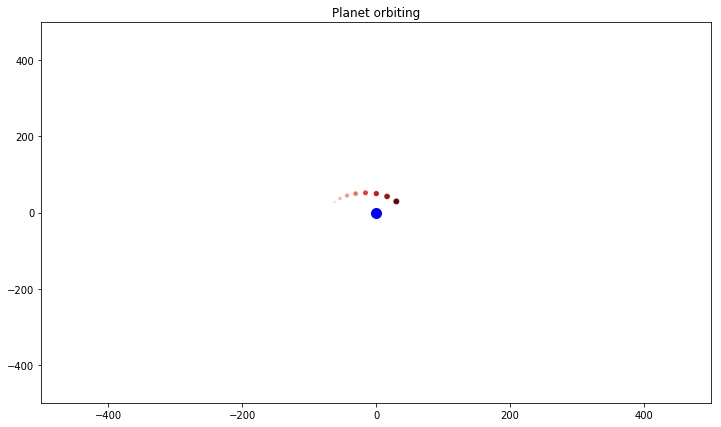

In [6]:
p1.orbit()

In [10]:
p2=planet(x0=50, y0=-50, v0x=1, v0y=1, m=300, n_iter=100, tstep=8)
p2.__dict__ 

{'x': 50, 'y': -50, 'v_x': 1, 'v_y': 1, 'mass': 300, 'n_iter': 100, 'tstep': 8}

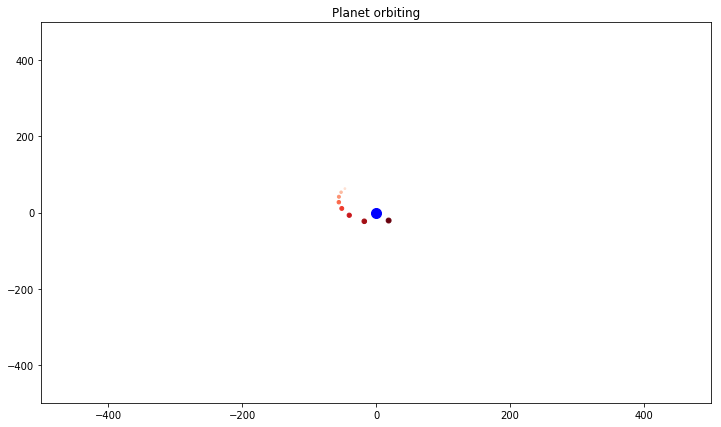

In [11]:
p2.orbit()